## Data Exploration and Cleaning 

#### How to choose the data point for the review users on the website

One of the most important assumptions of hypothesis testing is that we randomly sample the population to get **independent** sample data. For a specific user or for a group of users, the number of minutes spent on **each day** is not completely independent. For example, user A might be on a business trip this week and in general might spend less time on each day. Another example is that, a group of users might spend more time during the weekend and less time during the weekdays. Thus, I belive looking at total time spend for a specific user during the **entire experiment** period is a better option. 

### Cleaning Process and Insights from hypothesis testing

The following is the **conclusion and insights**:<br>

**1.** After doing the Welch's t-test, we found that p value is 0.554, which means there is no significant difference between control and treatment two groups.<br> 


The following is the **summary of the steps** I have taken:<br> 

 **1.**  Clean the dataset (sort the dataset by mins on each day for each user, and find the biggest values) 
 
 **2.** From the step above, get a list of user_ids that have logging errors in their record (in this case uid that has value of 99999)
 
 **3.** For both control and treatment, get rid all the records of the users in the above list.<br> 
 The reason we get rid of all their records not just the days that had log errors is that if there is a logging error for some days, we then do not know the actual minutes they spent on those days, so it is safe to not consider those users for the analysis. 
 
 **4.** Use **Welch's t test** to calculate the p value and confidence intervals.<br> 
 We used **Welch's t test** because **Welch's t test** is more robust when the two groups have difference variance and difference sample sizes. Since we do not have the information about the variances of the two groups and the sample size is different, we decided to use **Welch's t test**. 
 

In [1]:
import pandas as pd
import numpy as np 
import math
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
### read in the data 
df_user_min_post=pd.read_csv('data/t1_user_active_min.csv')

In [3]:
df_user_min_post.head(10)

,uid,dt,active_mins
0,0,2019-02-22,5.0
1,0,2019-03-11,5.0
2,0,2019-03-18,3.0
3,0,2019-03-22,4.0
4,0,2019-04-03,9.0
5,0,2019-04-06,1.0
6,0,2019-04-17,1.0
7,0,2019-05-07,3.0
8,0,2019-05-14,1.0
9,0,2019-05-19,1.0


In [4]:
#### look at the biggest values of active_mins to look for any outliers 
df_user_min_post.sort_values(by='active_mins', ascending=False)[:1000]

,uid,dt,active_mins
699598,31734,2019-05-19,99999.0
424289,19136,2019-03-10,99999.0
69742,3124,2019-05-10,99999.0
69745,3124,2019-05-16,99999.0
1057133,49503,2019-03-10,99999.0
424297,19136,2019-03-20,99999.0
881559,39773,2019-02-20,99999.0
189070,8441,2019-02-12,99999.0
167898,7508,2019-06-15,99999.0
881554,39773,2019-02-10,99999.0


In case there are negative values in the active_mins, we also look at the smallest values 

In [5]:
df_user_min_post.sort_values(by='active_mins', ascending=True)[:1000]

,uid,dt,active_mins
533200,23941,2019-02-20,1.0
264373,11922,2019-04-09,1.0
264376,11923,2019-02-27,1.0
264380,11923,2019-04-03,1.0
782125,35408,2019-04-21,1.0
264383,11923,2019-04-30,1.0
264385,11923,2019-05-06,1.0
264391,11923,2019-06-13,1.0
782117,35408,2019-03-16,1.0
264394,11924,2019-02-16,1.0


We look at the top **distinct** biggest values to see if there are records with obviours records: 

In [6]:
print sorted(list(df_user_min_post['active_mins'].unique()),reverse=True)[:100]

[99999.0, 897.0, 896.0, 895.0, 894.0, 893.0, 892.0, 891.0, 889.0, 888.0, 886.0, 885.0, 883.0, 881.0, 878.0, 877.0, 876.0, 874.0, 873.0, 872.0, 869.0, 868.0, 866.0, 865.0, 863.0, 862.0, 860.0, 859.0, 858.0, 856.0, 855.0, 854.0, 853.0, 851.0, 850.0, 849.0, 848.0, 847.0, 846.0, 844.0, 843.0, 842.0, 841.0, 840.0, 839.0, 838.0, 836.0, 834.0, 833.0, 832.0, 831.0, 830.0, 828.0, 827.0, 826.0, 825.0, 823.0, 822.0, 820.0, 819.0, 818.0, 817.0, 816.0, 815.0, 814.0, 812.0, 811.0, 809.0, 807.0, 806.0, 805.0, 804.0, 802.0, 801.0, 800.0, 799.0, 797.0, 796.0, 795.0, 794.0, 792.0, 790.0, 789.0, 788.0, 787.0, 786.0, 784.0, 783.0, 782.0, 781.0, 779.0, 778.0, 777.0, 776.0, 775.0, 772.0, 771.0, 770.0, 769.0, 766.0]


We can see that there are records with 99999 values. These records are obviously wrong because they are much larger
than total number of minutes in a day (24*60=1440). <br>
Thus, as mentioned in the summary part, we get rid of the users with incorrect record, clean the data and aggregate up to user level as explained in the previous question. 

In [7]:
user_id_invalid_post=list(df_user_min_post[df_user_min_post['active_mins']==99999].uid)

In [8]:
df_user_min_clean_post=df_user_min_post[~df_user_min_post['uid'].isin(user_id_invalid_post)]

In [9]:
df_user_agg_min_post=df_user_min_clean_post.groupby(['uid'])['active_mins'].sum().reset_index()

In [10]:
df_user_agg_min_post.head(10)

,uid,active_mins
0,0,43.0
1,1,15205.0
2,2,17.0
3,3,77.0
4,4,39.0
5,5,174.0
6,6,26.0
7,7,21.0
8,9,42.0
9,10,127.0


Now, merge the aggregated data with the treatment assignment table get their assignment. We then use Welch's t test to get the p values and confidence intervals. 

In [11]:
df_assignment=pd.read_csv('data/t2_user_variant.csv')
df_agg_merged_post=df_user_agg_min_post.merge(df_assignment, how='inner', on='uid')

assert len(df_user_agg_min_post)==len(df_agg_merged_post)

df_control=df_agg_merged_post[df_agg_merged_post['variant_number']==0]['active_mins']

df_treatment=df_agg_merged_post[df_agg_merged_post['variant_number']==1]['active_mins']

In [12]:
### getting the p values 
print stats.ttest_ind(df_treatment,df_control, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-0.5913430078053225, pvalue=0.5542997915180374)


In [13]:
### confidence intervals 
cm = sms.CompareMeans(sms.DescrStatsW(df_treatment), sms.DescrStatsW(df_control))
print cm.tconfint_diff(usevar='unequal')

(-40.648471571930244, 21.806634319581786)


In [14]:
print cm.summary(use_t=True, alpha=0.05, usevar='unequal', value=0)

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -9.4209     15.931     -0.591      0.554     -40.648      21.807


### How pre-experiment data affects your previous results

The following is the **conclusion and insights**:<br>

**1.** After doing the Welch's t-test for difference in post-pre experiment for each of control and treatment groups, we found that p value is close to 0, which means there is actually **significant treatment effect**. Since this result is different from what we observed in the previous section, we conducted a test to compare the control and treatment groups for pre-experiment period. As expected, there is actually significant difference between these two groups during pre-experiment engagement (average engagement for control is much higher than average engagement for treatment). This means the control/treatment allocation is not optimal. This results lead to the conclusiotn that this new feature is actually effective in increasing user engagement, however, due to non-optimal allocation for control and treatment groups, we were not able to observe the treatment effect in our first analysis.<br> 

The following is the **summary of the steps** I have taken:<br> 

 **1.**  Clean the dataset.<br> 
 
 Following the same logic as the previous question, we clean the dataset. First we get the uid of all the users who had obvious errors in their record and do not consider them for the analysis.  
 
 **2.** For each of control and treatment groups, we create a **difference** column that gives us the **difference** between post and pre experiment minutes for that user.
 
 **3.** Use Welch's t test to calculate the p value and confidence intervals.<br>
 We use Welch's t test to compare the **means of difference** between these two groups. We then generate the p-value and confidence intervals. 

In [15]:
### read in pre experiment data 
df_user_min_pre=pd.read_csv('data/t3_user_active_min_pre.csv')
print df_user_min_pre.head(10)

   uid          dt  active_mins
0    0  2018-09-24          3.0
1    0  2018-11-08          4.0
2    0  2018-11-24          3.0
3    0  2018-11-28          6.0
4    0  2018-12-02          6.0
5    0  2018-12-04          1.0
6    0  2018-12-07          8.0
7    0  2018-12-09          5.0
8    0  2018-12-14          8.0
9    0  2018-12-15          2.0


In [16]:
### look at the biggest and smallest values of the active mins.  
df_user_min_pre.sort_values(by='active_mins', ascending=False)[:1000]

,uid,dt,active_mins
983858,39773,2019-01-19,99999.0
934998,37805,2019-01-02,99999.0
357481,14412,2018-09-18,99999.0
211059,8441,2019-01-19,99999.0
293885,11818,2019-01-02,99999.0
164845,6611,2019-01-18,99999.0
552962,22230,2018-08-16,99999.0
821517,33434,2018-11-10,99999.0
891968,36186,2018-08-18,99999.0
891967,36186,2018-08-16,99999.0


In [17]:
print sorted(list(df_user_min_pre['active_mins'].unique()),reverse=True)[:100]

[99999.0, 897.0, 896.0, 895.0, 894.0, 893.0, 892.0, 891.0, 890.0, 889.0, 888.0, 887.0, 886.0, 885.0, 884.0, 883.0, 882.0, 879.0, 878.0, 877.0, 876.0, 873.0, 872.0, 870.0, 869.0, 867.0, 865.0, 864.0, 863.0, 862.0, 861.0, 859.0, 858.0, 857.0, 856.0, 855.0, 853.0, 852.0, 850.0, 846.0, 845.0, 844.0, 842.0, 841.0, 840.0, 839.0, 838.0, 836.0, 835.0, 834.0, 833.0, 832.0, 831.0, 830.0, 829.0, 828.0, 826.0, 825.0, 824.0, 823.0, 820.0, 819.0, 818.0, 816.0, 815.0, 813.0, 812.0, 811.0, 809.0, 808.0, 807.0, 806.0, 805.0, 803.0, 802.0, 801.0, 800.0, 799.0, 798.0, 797.0, 796.0, 795.0, 794.0, 793.0, 792.0, 791.0, 789.0, 788.0, 787.0, 785.0, 784.0, 781.0, 780.0, 779.0, 777.0, 776.0, 774.0, 773.0, 772.0, 771.0]


In [18]:
df_user_min_pre.sort_values(by='active_mins', ascending=True)[:1000]

,uid,dt,active_mins
830969,33819,2019-01-06,1.0
168976,6783,2018-12-06,1.0
650305,26247,2018-10-28,1.0
650311,26247,2019-01-02,1.0
650312,26247,2019-01-05,1.0
650316,26247,2019-01-28,1.0
932061,37696,2018-09-30,1.0
932057,37695,2018-11-20,1.0
931987,37694,2018-10-25,1.0
650318,26248,2018-08-11,1.0


In [19]:
user_id_invalid_pre=list(df_user_min_pre[df_user_min_pre['active_mins']==99999].uid)

In [20]:
user_id_invalid_all=list(set(user_id_invalid_post+user_id_invalid_pre))

In [21]:
df_user_min_post_clean=df_user_min_post[~df_user_min_post['uid'].isin(user_id_invalid_all)]
df_user_agg_post_min=df_user_min_post_clean.groupby(['uid'])['active_mins'].sum().reset_index()

df_agg_post_merged=df_user_agg_post_min.merge(df_assignment, how='inner', on='uid')

assert len(df_user_agg_post_min)==len(df_agg_post_merged)

df_control_post=df_agg_post_merged[df_agg_post_merged['variant_number']==0]

df_treatment_post=df_agg_post_merged[df_agg_post_merged['variant_number']==1]

Now, clean and create two groups for pre experiment 

In [22]:
df_user_min_pre_clean=df_user_min_pre[~df_user_min_pre['uid'].isin(user_id_invalid_all)]
df_user_agg_pre_min=df_user_min_pre_clean.groupby(['uid'])['active_mins'].sum().reset_index()

df_agg_pre_merged=df_user_agg_pre_min.merge(df_assignment, how='inner', on='uid')

assert len(df_user_agg_pre_min)==len(df_agg_pre_merged)

df_control_pre=df_agg_pre_merged[df_agg_pre_merged['variant_number']==0]

df_treatment_pre=df_agg_pre_merged[df_agg_pre_merged['variant_number']==1]

In [23]:
df_control_final=df_control_post.merge(df_control_pre, on='uid', how='inner', suffixes=['_post','_pre'] )
df_control_final['diff_mins']=df_control_final['active_mins_post']-df_control_final['active_mins_pre']

In [24]:
df_control_final.head(10)

,uid,active_mins_post,variant_number_post,dt_post,signup_date_post,active_mins_pre,variant_number_pre,dt_pre,signup_date_pre,diff_mins
0,0,43.0,0,2019-02-06,2018-09-24,70.0,0,2019-02-06,2018-09-24,-27.0
1,1,15205.0,0,2019-02-06,2016-11-07,19158.0,0,2019-02-06,2016-11-07,-3953.0
2,2,17.0,0,2019-02-06,2018-09-17,37.0,0,2019-02-06,2018-09-17,-20.0
3,3,77.0,0,2019-02-06,2018-03-04,108.0,0,2019-02-06,2018-03-04,-31.0
4,4,39.0,0,2019-02-06,2017-03-09,66.0,0,2019-02-06,2017-03-09,-27.0
5,5,174.0,0,2019-02-06,2018-06-25,21.0,0,2019-02-06,2018-06-25,153.0
6,6,26.0,0,2019-02-06,2017-01-22,12.0,0,2019-02-06,2017-01-22,14.0
7,7,21.0,0,2019-02-06,2016-08-12,34.0,0,2019-02-06,2016-08-12,-13.0
8,9,42.0,0,2019-02-06,2018-05-02,52.0,0,2019-02-06,2018-05-02,-10.0
9,10,127.0,0,2019-02-06,2014-02-11,74.0,0,2019-02-06,2014-02-11,53.0


In [25]:
df_treatment_final=df_treatment_post.merge(df_treatment_pre, on='uid', how='inner', suffixes=['_post','_pre'] )
df_treatment_final['diff_mins']=df_treatment_final['active_mins_post']-df_treatment_final['active_mins_pre']

In [26]:
print df_treatment_final.head(10)

     uid  active_mins_post  variant_number_post     dt_post signup_date_post  \
0  40001             299.0                    1  2019-02-06       2017-04-29   
1  40002             183.0                    1  2019-02-06       2015-08-22   
2  40004              56.0                    1  2019-02-06       2015-04-12   
3  40005             289.0                    1  2019-02-06       2017-03-05   
4  40006             194.0                    1  2019-02-06       2016-06-17   
5  40007              75.0                    1  2019-02-06       2017-05-15   
6  40008             359.0                    1  2019-02-06       2017-06-15   
7  40009             553.0                    1  2019-02-06       2017-11-24   
8  40010              21.0                    1  2019-02-06       2013-09-05   
9  40011             153.0                    1  2019-02-06       2015-09-12   

   active_mins_pre  variant_number_pre      dt_pre signup_date_pre  diff_mins  
0            125.0                   1 

In [27]:
print "mean of difference for treatment is", df_treatment_final['diff_mins'].mean()
print "mean of different for control is", df_control_final['diff_mins'].mean()

mean of difference for treatment is 145.146605444
mean of different for control is -45.718459638


In [28]:
print stats.ttest_ind(df_treatment_final['diff_mins'],df_control_final['diff_mins'], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=19.15448443381799, pvalue=9.523060530029418e-81)


In [29]:
cm = sms.CompareMeans(sms.DescrStatsW(df_treatment_final['diff_mins']), sms.DescrStatsW(df_control_final['diff_mins']))
print cm.tconfint_diff(usevar='unequal')

(171.33329655405635, 210.39683361076806)


In [30]:
print cm.summary(use_t=True, alpha=0.05, usevar='unequal', value=0)

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    190.8651      9.965     19.154      0.000     171.333     210.397


We do a Welch's t test analysis for the pre experiment groups

In [31]:
print "mean of active mins for treatment during pre-experiment period is", df_treatment_pre['active_mins'].mean()
print "mean of active mins for control during pre-experiment period is", df_control_pre['active_mins'].mean()

mean of active mins for treatment during pre-experiment period is 257.595678077
mean of active mins for control during pre-experiment period is 442.609506058


In [32]:
print stats.ttest_ind(df_control_pre['active_mins'],df_treatment_pre['active_mins'], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=15.238744846186881, pvalue=3.3439634782510464e-52)


In [33]:
cm = sms.CompareMeans(sms.DescrStatsW(df_control_pre['active_mins']), sms.DescrStatsW(df_treatment_pre['active_mins']))
print cm.tconfint_diff(usevar='unequal')
print cm.summary(use_t=True, alpha=0.05, usevar='unequal', value=0)

(161.21673307799026, 208.81092288287303)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    185.0138     12.141     15.239      0.000     161.217     208.811


### Does different users segements have different active min?

The following is the **conclusion and insights**:<br>

**1.** After running t-test for each segments (e.g non_reader, new_user), we found out that p values for new user and contributor segments are much larger than p values for other segments such as reader or non-readers. This might indicate that this new feature is less attractive to new users or contributors and more effective towards reader as well as non-reader segments. As a data scientist, I recommend that we test each of these segments seperately and I would suggest we might be able to come up with other new features that might be more attracitve to contributors and new users.  

The following is the **summary of the steps** I have taken: 

**1.**  For each segment such as non_reader, reader, new_user,contributer, male and female, I have run **Welch's t test** and recorded the p_values as well as the confidence intervals. 

**2.** I created a helper class ( **TreatmentAnalyzer** ) to run multiple Welch's t tests. 

In [34]:
df_att=pd.read_csv('data/t4_user_attributes.csv')
print df_att.head(10)

   uid  gender   user_type
0    0    male  non_reader
1    1    male      reader
2    2    male  non_reader
3    3    male  non_reader
4    4    male  non_reader
5    5  female  non_reader
6    6  female  non_reader
7    7    male  non_reader
8    8    male    new_user
9    9  female  non_reader


In [35]:
print df_att['user_type'].unique() 

['non_reader' 'reader' 'new_user' 'contributor']


#### In the following section, we analyze the treatment effect for different cohorts seperately 

In [36]:
class UnsupportedFilterType(Exception):
    '''
    Exception class used for unsupported query type
    '''
    def __init__(self, message):
        super(UnsupportedFilterType, self).__init__(message)

class TreatmentAnalyzer (object):
    '''
    
    '''
    def __init__(self, control,treatment):
        self.control=control 
        self.treatment=treatment
        self.filter_vals=[]
        self.conf_lower=[]
        self.conf_upper=[]
        self.p_val=[]
        self.t_stats=[]
    
    def filter(self,filter_dict):
        if 'user_type' in filter_dict:
            cur_control=self.control[self.control['user_type']==filter_dict['user_type']]
            cur_treatment=self.treatment[self.treatment['user_type']==filter_dict['user_type']]
            
            self.filter_vals.append(filter_dict['user_type'])
            
            return (cur_control, cur_treatment)
        elif 'gender' in filter_dict:
            cur_control=self.control[self.control['gender']==filter_dict['gender']]
            cur_treatment=self.treatment[self.treatment['gender']==filter_dict['gender']] 
            
            self.filter_vals.append(filter_dict['gender'])
            
            return (cur_control, cur_treatment)
        else:
            raise UnsupportedFilterType()
    def run_analysis(self,filter_dict):
        
        cur_control,cur_treatment=self.filter(filter_dict)
        res=stats.ttest_ind(cur_treatment['diff_mins'],cur_control['diff_mins'], axis=0, equal_var=False, nan_policy='propagate')
        self.p_val.append(res.pvalue)
        self.t_stats.append(res.statistic)
        
        cm = sms.CompareMeans(sms.DescrStatsW(cur_treatment['diff_mins']), sms.DescrStatsW(cur_control['diff_mins']))
        conf_bound=cm.tconfint_diff(usevar='unequal')
        
        self.conf_lower.append(conf_bound[0])
        
        self.conf_upper.append(conf_bound[1])
        
        

In [37]:
df_control_att=df_control_final.merge(df_att, how='inner', on='uid')
df_treatment_att=df_treatment_final.merge(df_att, how='inner', on='uid')

In [38]:
analyzer=TreatmentAnalyzer(df_control_att,df_treatment_att)

In [39]:
print analyzer.control.head(10)

   uid  active_mins_post  variant_number_post     dt_post signup_date_post  \
0    0              43.0                    0  2019-02-06       2018-09-24   
1    1           15205.0                    0  2019-02-06       2016-11-07   
2    2              17.0                    0  2019-02-06       2018-09-17   
3    3              77.0                    0  2019-02-06       2018-03-04   
4    4              39.0                    0  2019-02-06       2017-03-09   
5    5             174.0                    0  2019-02-06       2018-06-25   
6    6              26.0                    0  2019-02-06       2017-01-22   
7    7              21.0                    0  2019-02-06       2016-08-12   
8    9              42.0                    0  2019-02-06       2018-05-02   
9   10             127.0                    0  2019-02-06       2014-02-11   

   active_mins_pre  variant_number_pre      dt_pre signup_date_pre  diff_mins  \
0             70.0                   0  2019-02-06      2018

In [40]:
list_filters=[{'user_type':'new_user'},{'user_type':'reader'},{'user_type':'contributor'},{'user_type':'non_reader'},{'gender':'male'},{'gender':'female'}]
for cur_filter in list_filters:
    analyzer.run_analysis(cur_filter)

df_result=pd.DataFrame({'p_value':analyzer.p_val, 't_stats':analyzer.t_stats, 'lower_bound':analyzer.conf_lower,'upper_bound':analyzer.conf_upper ,'segment':analyzer.filter_vals})
df_result=df_result[['segment','p_value','t_stats','lower_bound','upper_bound']]

In [41]:
df_result 

,segment,p_value,t_stats,lower_bound,upper_bound
0,new_user,2.355253e-03,3.048835,8.948824,41.269589
1,reader,6.915164e-47,14.849731,669.660959,873.486657
2,contributor,1.387495e-04,3.912922,665.638803,2024.003556
3,non_reader,1.782953e-40,13.388944,57.947727,77.826002
4,male,2.228340e-46,14.397722,187.364735,246.426360
5,female,2.174819e-25,10.476219,121.477917,177.411256


#### Some visualization of the dataset 

The following is a simple visualization of the portions of different user type segments for control and treatment. As we can see, there is no much different between control and treatment in terms of segment allocation. 

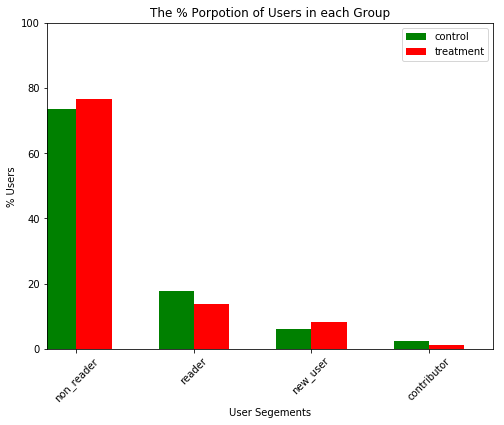

In [42]:
width=0.3
plt.figure(figsize=(8,6))
ax=plt.subplot()
((df_control_att.user_type.value_counts()/len(df_control_att))*100).plot.bar(color='green',width=width,position=1)  
((df_treatment_att.user_type.value_counts()/len(df_treatment_att))*100).plot.bar(color='red',width=width,position=0)
ax.set_ylabel('%')
plt.ylim(0, 100)
plt.legend(['control','treatment'])
plt.title('The % Porpotion of Users in each Group')
ax.set_xlabel("User Segements")
ax.set_ylabel("% Users")
plt.xticks(rotation = 45)
plt.show()

### What types of suggestions or any other business models would you give for the PM if there is big difference in pre and post experimentation

The following is the list of ideas I would suggest:<br>

 **1.** I would look at the retention rate of the following two groups: users who have installed the app and users who have not installed the app in their phone. I would compare the retention rate of these two groups. If I see some results that shows there is sinnificant different in **average retention rate** between these two groups (users who installed the app have high retention rate), I then suggest to the product team that we should roll out a feature that incentivizes the users who have installed the app on their phone. An example of the incentive is giving the users some icon or reputation when they install the app. 
 

 **2.** I would look at the retention rate of the following two groups: users who have received regular emails with some interesting questions/answers and users who have not received such emails. I would compare the retention rate of these two groups. If I see some results that shows there is sinnificant different in **average retention rate** between these two groups (users who received emails have high retention rate), I then suggest to the product team that we should send out regular emails with some interesting questions/answers to our users. 
 
 
 **3.** I would look at the churn rate (churn rate defined as portion of users who stopped coming to our platform) of the following two groups: users who got answers to most of their questions (more than half of their questions) and users who have not gotten answer to most of their questions.If I see observe results that show there is sifnificant difference between these two groups' **average churn rate** (users who have gotten answers to their questions have less churn rate), then I would suggest that we hire some professional people to answer users questions if their questions are not answered by other users during certain period of time. 
